In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from spp.convex_sets import Polyhedron, Ellipsoid
from spp.motion_planning import MotionPlanner, Bezier

In [3]:
safe_sets = [
    Polyhedron.from_vertices(([0, 1], [0, -1], [3, -1], [3, 1])),
    Polyhedron.from_vertices(([4, 0], [5, -2], [3, -2], [2, -1])),
    Polyhedron.from_vertices(([2, 0], [1, 1], [2, 2], [4, 2], [4, 1])),
    Polyhedron.from_vertices(([5, 3], [8, 3], [7, 2], [5, 1])),
    Polyhedron.from_vertices(([7, 0], [8, 0], [9, 1], [8, 2])),
    Polyhedron.from_vertices(([7, 1], [9, 1], [9, 3], [7, 3])),
    Ellipsoid((4.5, 2), ([1, 0], [0, 1])),
    Ellipsoid((8, 0), ([.25, 0], [0, 1])),
    Ellipsoid((6, 0), ([1, 0], [0, .25])),
    Ellipsoid((5, -1), ([.5, 0], [0, 1])),
]
qs = np.array([1, 0])
qt = np.array([8, 2])

def plot_safe_sets():
    for S in safe_sets:
        S.plot()
    plt.scatter(*qs, zorder=4, c='k')
    plt.scatter(*qt, zorder=4, c='k')

In [4]:
degree = 2
planner = MotionPlanner(safe_sets, qs, qt, degree, relaxation=0)
control_points = planner.solve()

(2, 11)


<IPython.core.display.Javascript object>


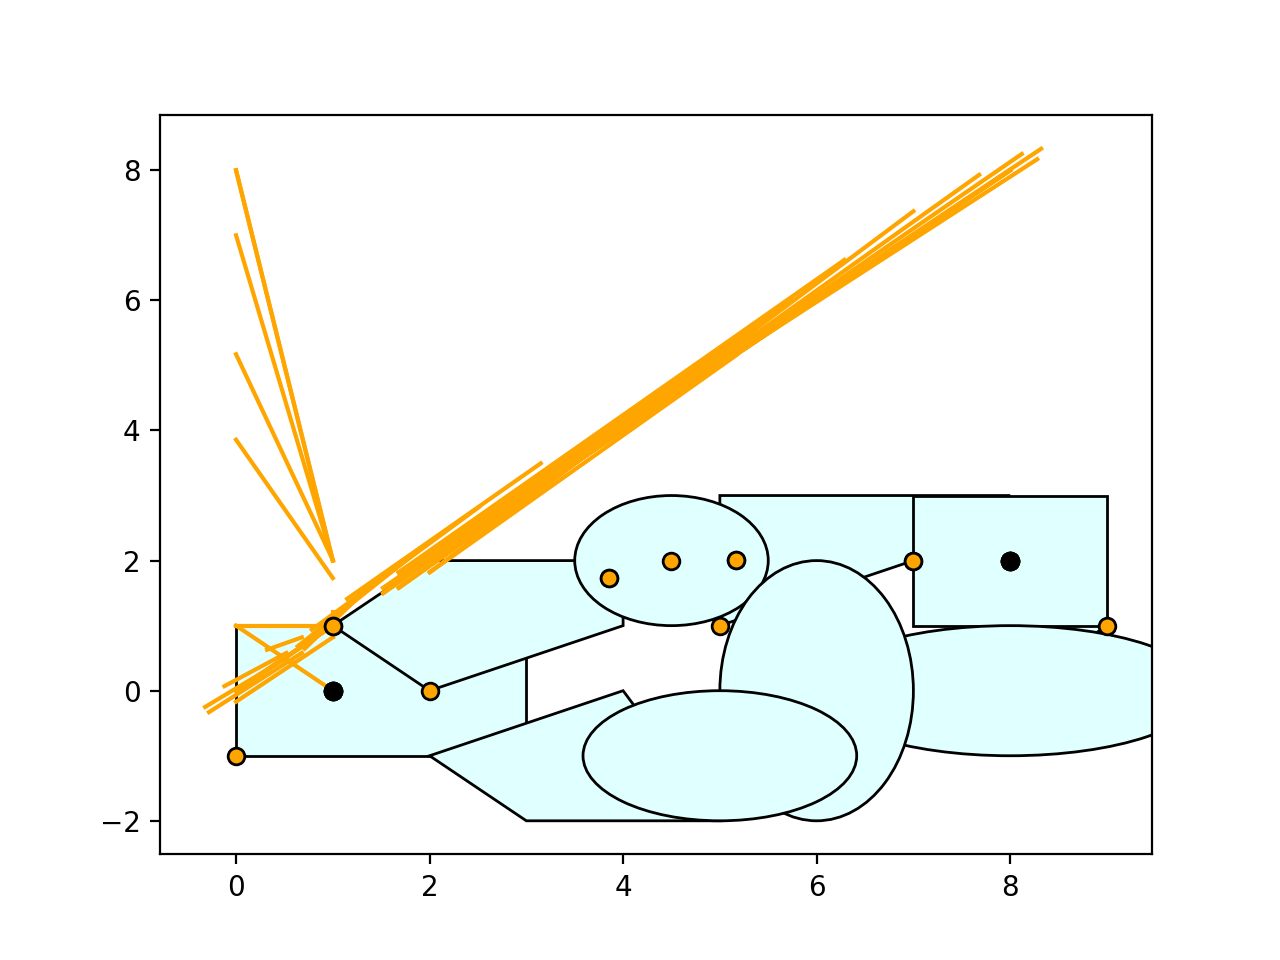

(2, 11)
(2, 11)
(2, 11)
(2, 11)
(2, 11)
(2, 11)


In [8]:
def plot_curve(curve, **kwargs):
    t = np.linspace(0, 1, 11)
    points = curve.evaluate(t)
    plt.plot(*points.T, **kwargs)

for points_in_set in control_points:
    curve = Bezier(points_in_set)
    plot_curve(curve, c='orange')

plot_safe_sets()
for points_in_set in control_points:
    plt.scatter(*points_in_set.T, zorder=3, fc='orange', ec='k')
plt.savefig('bezier.pdf', bbox_inches='tight')